# Week 1: Day 4 PM // Pandas Basic

# NBA dataset analysis

Now that you’ve installed Pandas, it’s time to have a look at a dataset. In this session, you’ll analyze NBA results provided by FiveThirtyEight in a 17MB CSV file.

In [2]:
import numpy as np
import pandas as pd

Here, you follow the convention of importing Pandas in Python with the pd alias. Then, you use .read_csv() to read in your dataset and store it as a DataFrame object in the variable nba.

Note: Is your data not in CSV format? No worries! The Pandas Python library provides several similar functions like read_json(), read_html(), and read_sql_table().

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

You can see how much data nba contains:

In [4]:
len(df)

126314

In [5]:
df.shape

(126314, 23)

You use the Python built-in function `len()` to determine the number of rows. You also use the `.shape` attribute of the DataFrame to see its **dimensionality**. The result is a tuple containing the number of rows and columns.

Now you know that there are 126,314 rows and 23 columns in your dataset.

But how can you be sure the dataset really contains basketball stats? You can have a look at the first five rows with `.head()`:

In [6]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Unless your screen is quite large, your output probably won’t display all 23 columns. Somewhere in the middle, you’ll see a column of ellipses (...) indicating the missing data. If you’re working in a terminal, then that’s probably more readable than wrapping long rows.

However, Jupyter notebooks will allow you to scroll. You can configure Pandas to display all 23 columns like this:

In [7]:
pd.set_option("display.max.columns", None)
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


While it’s practical to see all the columns, you probably won’t need six decimal places! Change it to two:

In [8]:
pd.set_option("display.precision", 5)
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN


To verify that you’ve changed the options successfully, you can execute `.head()` again, or you can display the last five rows with `.tail()` instead:



In [9]:
df.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.30979,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.54657,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.01333,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.76557,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.6349,1822.2881,68.51952,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.51855,NaN


You can discover some further possibilities of `.head()` and `.tail()` with a small exercise. Can you print the last three lines of your DataFrame?

In [10]:
df.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.6349,1822.2881,68.51952,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.51855,NaN


In the data file `nbaallelo.csv` are the following variables:

Header | Definition
---|---
`gameorder` | Play order of game in NBA history
`game_id` | Unique ID for each game
`lg_id` | Which league the game was played in
`_iscopy` | Each row of data is tied to a single team for a single game, so _iscopy flags if this game_id has already occured for the opposing team in the same matchup
`year_id` | Season id, named based on year in which the season ended
`date_game` | Game date
`is_playoffs` | Flag for playoff games
`team_id` | Three letter code for team name, from Basketball Reference
`fran_id` | Franchise id. Multiple team_ids can fall under the same fran_id due to name changes or moves. Interactive is grouped by fran_id.
`pts` | Points scored by team
`elo_i` | Team elo entering the game
`elo_n` | Team elo following the game
`win_equiv` | Equivalent number of wins in a 82-game season for a team of elo_n quality
`opp_id` | Team id of opponent
`opp_fran` | Franchise id of opponent
`opp_pts` | Points scored by opponent
`opp_elo_i` | Opponent elo entering the game
`opp_elo_n` | Opponent elo following the game
`game_location` | Home (H), away (A), or neutral (N)
`game_result` | Win or loss for team in the team_id column
`forecast` | Elo-based chances of winning for the team in the team_id column, based on elo ratings and game location
`notes` | Additional information

## Getting to Know Your Data

You’ve imported a CSV file with the Pandas Python library and had a first look at the contents of your dataset. So far, you’ve only seen the size of your dataset and its first and last few rows. Next, you’ll learn how to examine your data more systematically.

### Displaying Data Types

The first step in getting to know your data is to discover the different data types it contains. While you can put anything into a list, the columns of a DataFrame contain values of a specific data type. When you compare Pandas and Python data structures, you’ll see that this behavior makes Pandas much faster!

You can display all columns and their data types with `.info()`:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

You’ll see a list of all the columns in your dataset and the type of data each column contains. Here, you can see the data types `int64`, `float64`, and `object`. Pandas uses the NumPy library to work with these types. Later, you’ll meet the more complex categorical data type, which the Pandas Python library implements itself.

### Showing Basics Statistics

Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with `.describe()`:

In [12]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00000,126314.0,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000,126314.00000
mean,31579.00000,0.5,1988.20037,43.53373,0.06386,102.72998,1495.23606,1495.23606,41.70789,102.72998,1495.23606,1495.23606,0.50000
std,18231.92764,0.5,17.58231,25.37518,0.24450,14.81484,112.13995,112.46169,10.62733,14.81484,112.13995,112.46169,0.21525
min,1.00000,0.0,1947.00000,1.00000,0.00000,0.00000,1091.64450,1085.77440,10.15250,0.00000,1091.64450,1085.77440,0.02045
25%,15790.00000,0.0,1975.00000,22.00000,0.00000,93.00000,1417.23798,1416.99490,34.10303,93.00000,1417.23798,1416.99490,0.32799
50%,31579.00000,0.5,1990.00000,43.00000,0.00000,103.00000,1500.94555,1500.95440,42.11336,103.00000,1500.94555,1500.95440,0.50000
75%,47368.00000,1.0,2003.00000,65.00000,0.00000,112.00000,1576.06000,1576.29163,49.63533,112.00000,1576.06000,1576.29163,0.67201
max,63157.00000,1.0,2015.00000,108.00000,1.00000,186.00000,1853.10450,1853.10450,71.11204,186.00000,1853.10450,1853.10450,0.97955


### Exploring Your Dataset

Exploratory data analysis can help you answer questions about your dataset. For example, you can examine how often specific values occur in a column:

In [13]:
df["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
PIT      60
TRH      60
DTF      60
INJ      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [14]:
df["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:

In [15]:
df.loc[df["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

Indeed, the Minneapolis Lakers ("MNL") played 946 games. You can even find out when they played those games:

In [16]:
df.loc[df["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [17]:
df.loc[df["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [18]:
df.loc[df["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [19]:
df.loc[df["date_game"] == "1/1/1949"]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1424,713,194901010BLB,NBA,0,1949,1/1/1949,27,0,BLB,Baltimore,72,1469.2614,1471.9954,44.06302,BOS,Celtics,67,1356.6797,1353.9457,H,W,0.77272,NaN
1425,713,194901010BLB,NBA,1,1949,1/1/1949,25,0,BOS,Celtics,67,1356.6797,1353.9457,31.84284,BLB,Baltimore,72,1469.2614,1471.9954,A,L,0.22728,NaN
1426,714,194901010LAL,NBA,1,1949,1/1/1949,27,0,FTW,Pistons,72,1438.1783,1432.4192,39.91762,MNL,Lakers,92,1570.0210,1575.7802,A,L,0.20840,NaN
1427,714,194901010LAL,NBA,0,1949,1/1/1949,27,0,MNL,Lakers,92,1570.0210,1575.7802,54.44023,FTW,Pistons,72,1438.1783,1432.4192,H,W,0.79160,NaN
1428,715,194901010NYK,NBA,1,1949,1/1/1949,27,0,PHW,Warriors,80,1448.4330,1443.6904,41.09967,NYK,Knicks,88,1501.3507,1506.0933,A,L,0.29312,NaN
1429,715,194901010NYK,NBA,0,1949,1/1/1949,25,0,NYK,Knicks,88,1501.3507,1506.0933,47.58786,PHW,Warriors,80,1448.4330,1443.6904,H,W,0.70688,NaN
1430,716,194901010PRO,NBA,0,1949,1/1/1949,26,0,PRO,Steamrollers,77,1197.5355,1193.8218,17.92749,INJ,Jets,78,1320.0280,1323.7417,H,L,0.46768,NaN
1431,716,194901010PRO,NBA,1,1949,1/1/1949,26,0,INJ,Jets,78,1320.0280,1323.7417,28.88947,PRO,Steamrollers,77,1197.5355,1193.8218,A,W,0.53232,NaN
1432,717,194901010ROC,NBA,0,1949,1/1/1949,25,0,ROC,Kings,106,1548.4718,1554.8334,52.44599,STB,Bombers,83,1416.8989,1410.5374,H,W,0.79134,NaN
1433,717,194901010ROC,NBA,1,1949,1/1/1949,24,0,STB,Bombers,83,1416.8989,1410.5374,37.62968,ROC,Kings,106,1548.4718,1554.8334,A,L,0.20866,NaN


It looks like the Minneapolis Lakers played between the years of 1949 and 1959. That explains why you might not recognize this team!

You’ve also found out why the Boston Celtics team "BOS" played the most games in the dataset. Let’s analyze their history also a little bit. Find out how many points the Boston Celtics have scored during all matches contained in this dataset.

In [20]:
df.loc[df["team_id"] == "BOS", "pts"].sum()

626484

The Boston Celtics scored a total of 626,484 points.

## Getting to Know Pandas’ Data Structures

While a DataFrame provides functions that can feel quite intuitive, the underlying concepts are a bit trickier to understand.


You can see these concepts in action with the bigger NBA dataset. Does it contain a column called "points", or was it called "pts"?

Because you didn’t specify an index column when you read in the CSV file, Pandas has assigned a RangeIndex to the DataFrame:

In [21]:
df.index

RangeIndex(start=0, stop=126314, step=1)

df, like all DataFrame objects, has two axes:

In [22]:
df.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

You can check the existence of a column with `.keys()`:

In [23]:
"points" in df.keys()

False

In [24]:
"pts" in df.keys()

True

The column is called "pts", not "points".

### Accessing DataFrame Elements

Since a DataFrame consists of Series objects, you can use the very same tools to access its elements. The crucial difference is the additional dimension of the DataFrame. You’ll use the indexing operator for the columns and the access methods `.loc` and `.iloc` on the rows.

The second-to-last row is the row with the positional index of -2. You can display it with .iloc:

In [25]:
df.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                  1700.7
elo_n                  1692.1
win_equiv               59.29
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i              1813.6
opp_elo_n              1822.3
game_location               H
game_result                 L
forecast              0.48145
notes                     NaN
Name: 126312, dtype: object

For a DataFrame, the data access methods .loc and .iloc also accept a second parameter. While the first parameter selects rows based on the indices, the second parameter selects the columns. You can use these parameters together to select a subset of rows and columns from your DataFrame:

Select all games between the labels 5555 and 5559. You’re only interested in the names of the teams and the scores, so select those elements as well. 

In [26]:
 df.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


## Querying Your Dataset

Query is a precise request for information, A query can either be a request for data results from your database or for action on the data, or for both.
You’ve seen how to access subsets of a huge dataset based on its indices. Now, you’ll select rows based on the values in your dataset’s columns to query your data. For example, you can create a new DataFrame that contains only games played after 2010:

In [27]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.30979,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.54657,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.01333,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.76557,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN


In [28]:
current_decade = df[df["year_id"] > 2010]

In [29]:
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.3638,1543.1600,45.14148,BOS,Celtics,88,1625.0994,1629.3031,A,L,0.26442,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.0994,1629.3031,53.75456,MIA,Heat,80,1547.3638,1543.1600,H,W,0.73558,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.1956,1502.5969,40.90076,LAL,Lakers,112,1647.6016,1649.2002,A,L,0.19763,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.6016,1649.2002,55.60873,HOU,Rockets,110,1504.1956,1502.5969,H,W,0.80237,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.0225,1630.6204,53.87923,POR,Trailblazers,106,1552.8141,1565.2162,A,L,0.48591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.30979,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.54657,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.01333,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.76557,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN


In [30]:
current_decade.shape

(12658, 23)

You still have all 23 columns, but your new DataFrame only consists of rows where the value in the `"year_id"` column is greater than 2010.

You can also select the rows where a specific field is not null:

In [31]:
games_with_notes = df[df["notes"].notnull()]
print(games_with_notes.shape)


(5424, 23)


This can be helpful if you want to avoid any missing values in a column. You can also use `.notna()` to achieve the same goal.

You can even access values of the object data type as `str` and perform string methods on them:

In [32]:
ers = df[df["fran_id"].str.endswith("ers")]

In [33]:
ers.shape

(27797, 23)

You use `.str.endswith()` to filter your dataset and find all games where the home team’s name ends with `"ers"`.

Do a search for Baltimore games where both teams scored over 100 points. In order to see each game only once, you’ll need to exclude duplicates:

In [34]:
df[
    (df["_iscopy"] == 0) &
    (df["pts"] > 100) &
    (df["opp_pts"] > 100) &
    (df["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.55755,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.33894,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.79779,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.28185,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.87624,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.22424,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.57968,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.17897,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.73699,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.25336,at Worcester MA


In [35]:
df.query("_iscopy == 0 & pts > 100 & \
          opp_pts > 100 & \
          team_id == 'BLB'")

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.55755,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.33894,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.79779,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.28185,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.87624,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.22424,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.57968,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.17897,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.73699,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.25336,at Worcester MA


Here, you use `df["_iscopy"] == 0` to include only the entries that aren’t copies.

Your output should contain five eventful games

Try to build another query with multiple criteria. In the spring of 1992, both teams from Los Angeles had to play a home game at another court. Query your dataset to find those two games. Both teams have an ID starting with "LA".

You can use `.str` to find the team IDs that start with "LA", and you can assume that such an unusual game would have some notes:

In [36]:
df("_iscopy == 0 & \
    team_id.str.startswith('LA') & \
    year_id == 1992 &\
    (notes).notnull()")

TypeError: 'DataFrame' object is not callable

In [37]:
df[
    (df["_iscopy"] == 0) &
    (df["team_id"].str.startswith("LA")) &
    (df["year_id"] == 1992) &
    (df["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.9009,1556.0005,47.88825,UTA,Jazz,107,1647.5092,1638.4095,H,W,0.49912,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.6460,1474.3994,39.39541,POR,Trailblazers,102,1655.1210,1670.3677,H,L,0.40687,"at Las Vegas, NV"


When you know how to query your dataset with multiple criteria, you’ll be able to answer more specific questions about your dataset.

## Grouping and Aggregating Your Data

You may also want to learn other features of your dataset, like the sum, mean, or average value of a group of elements. Luckily, the Pandas Python library offers grouping and aggregation functions to help you accomplish this task.

Remember, a column of a DataFrame is actually a Series object. For this reason, you can use these same functions on the columns of nba:

In [38]:
points = df["pts"]

In [39]:
points.sum()

12976235

A DataFrame can have multiple columns, which introduces new possibilities for aggregations, like grouping:

In [40]:
df.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN


In [41]:
df.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [42]:
df.groupby("fran_id", sort=True)["pts"].sum()

fran_id
Baltimore        37219
Bombers          17793
Bucks           418326
Bulls           437269
Capitols         22387
Cavaliers       380416
Celtics         626484
Clippers        380523
Colonels         94435
Condors          49642
Denver            4818
Falcons           3797
Floridians       49568
Grizzlies       157683
Hawks           567261
Heat            229103
Hornets          84489
Huskies           3995
Ironmen           3674
Jazz            363155
Jets              4482
Kings           569245
Knicks          582497
Lakers          637444
Magic           219436
Mavericks       309239
Nets            417809
Nuggets         445780
Olympians        22864
Pacers          438288
Packers           6193
Pelicans        220794
Pistons         572758
Raptors         158370
Rebels            4474
Redskins          5372
Rockets         432504
Sails            30080
Sixers          585891
Sounds           75582
Spirits          85874
Spurs           453822
Squires          91127
Sta

By default, Pandas sorts the group keys during the call to `.groupby()`. If you don’t want to sort, then pass sort=False. This parameter can lead to performance gains.

You can also group by multiple columns:

In [43]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN


In [48]:
df[
    (df["fran_id"] == "Spurs") &
    (df["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

You can practice these basics with an exercise. Take a look at the Golden State Warriors’ 2014-15 season (year_id: 2015). 

How many wins and losses did they score during the regular season and the playoffs?

First, you can group by the `"is_playoffs"` field, then by the result:

In [49]:
df[
    (df["fran_id"] == "Warriors") &
    (df["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

`is_playoffs=0` shows the results for the regular season, and `is_playoffs=1` shows the results for the playoffs.

## Manipulating Columns

You’ll need to know how to manipulate your dataset’s columns in different phases of the data analysis process. You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

Create a copy of your original DataFrame to work with:

In [50]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.30979,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.54657,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.01333,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.76557,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN


In [36]:
nba = df.copy()

In [52]:
nba.shape

(126314, 23)

You can define new columns based on the existing ones:

In [53]:
nba["difference"] = df.pts - df.opp_pts

In [54]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.30979,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.54657,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.01333,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.76557,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.01007,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.23443,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.29024,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.48145,NaN,-8


In [55]:
nba.shape

(126314, 24)

Here, you used the `"pts"` and `"opp_pts"` columns to create a new one called `"difference"`. This new column has the same functions as the old ones:

In [58]:
nba["difference"].max()

68

Here, you used an aggregation function `.max()` to find the largest value of your new column.

You can also rename the columns of your dataset. It seems that `"game_result"` and `"game_location"` are too verbose, so go ahead and rename them now:

In [59]:
renamed_nba = nba.rename(
    columns={"game_result": "result", "game_location": "location"}
)

renamed_nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,location,result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN,-17


Note that there’s a new object, `renamed_nba`. Like several other data manipulation methods, `.rename()` returns a new DataFrame by default. If you want to manipulate the original DataFrame directly, then `.rename()` also provides an inplace parameter that you can set to `True`.

Your dataset might contain columns that you don’t need. For example, Elo ratings may be a fascinating concept to some, but you won’t analyze them in this tutorial. You can delete the four columns related to Elo:

In [60]:
nba.shape

(126314, 24)

In [39]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]

In [40]:
nba.drop(elo_columns, inplace=True, axis=1)

In [41]:
nba.shape

(126314, 19)

In [42]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,40.29483,NYK,Knicks,68,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,41.70517,TRH,Huskies,66,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,42.01226,NYK,Knicks,47,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,40.69278,CHS,Stags,63,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,38.86405,WSC,Capitols,50,H,L,0.64007,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,60.30979,GSW,Warriors,103,H,L,0.54657,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,68.01333,CLE,Cavaliers,91,H,W,0.76557,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,60.01007,GSW,Warriors,104,A,L,0.23443,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,59.29024,GSW,Warriors,105,H,L,0.48145,NaN


Remember, you added the new column `"difference"` in a previous example, bringing the total number of columns to 24. When you remove the four Elo columns, the total number of columns drops to 20.

## Specifying Data Types

When you create a new DataFrame, either by calling a constructor or reading a CSV file, Pandas assigns a data type to each column based on its values. While it does a pretty good job, it’s not perfect. If you choose the right data type for your columns upfront, then you can significantly improve your code’s performance.

Take another look at the columns of the nba dataset:

In [65]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

Ten of your columns have the data type object. Most of these object columns contain arbitrary text, but there are also some candidates for data type conversion. For example, take a look at the `date_game` column:

In [64]:
nba["date_game"] = pd.to_datetime(nba["date_game"])
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29483,NYK,Knicks,68,H,L,0.64007,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.70517,TRH,Huskies,66,A,W,0.35993,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01226,NYK,Knicks,47,H,W,0.63110,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69278,CHS,Stags,63,A,L,0.36890,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86405,WSC,Capitols,50,H,L,0.64007,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.30979,GSW,Warriors,103,H,L,0.54657,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01333,CLE,Cavaliers,91,H,W,0.76557,NaN,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01007,GSW,Warriors,104,A,L,0.23443,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29024,GSW,Warriors,105,H,L,0.48145,NaN,-8


Here, you use `.to_datetime()` to specify all game dates as datetime objects.

Other columns contain text that are a bit more structured. The game_location column can have only three different values:

In [69]:
nba["game_location"]

0         H
1         A
2         H
3         A
4         H
         ..
126309    H
126310    H
126311    A
126312    H
126313    A
Name: game_location, Length: 126314, dtype: object

In [72]:
nba["game_location"].unique()

array(['H', 'A', 'N'], dtype=object)

In [67]:
nba["game_location"].nunique()

3

In [73]:
nba["team_id"]

0         TRH
1         NYK
2         CHS
3         NYK
4         DTF
         ... 
126309    CLE
126310    GSW
126311    CLE
126312    CLE
126313    GSW
Name: team_id, Length: 126314, dtype: object

In [74]:
nba["team_id"].unique()

array(['TRH', 'NYK', 'CHS', 'DTF', 'WSC', 'BOS', 'PRO', 'PIT', 'STB',
       'CLR', 'PHW', 'BLB', 'INJ', 'FTW', 'MNL', 'ROC', 'TRI', 'DNN',
       'INO', 'SHE', 'WAT', 'AND', 'SYR', 'MLH', 'STL', 'DET', 'CIN',
       'LAL', 'CHP', 'CHZ', 'SFW', 'BAL', 'PHI', 'CHI', 'SEA', 'OAK',
       'ANA', 'SDR', 'KEN', 'INA', 'DNR', 'DLC', 'HSM', 'NOB', 'MNM',
       'NJA', 'PTP', 'ATL', 'MIL', 'PHO', 'NYA', 'MMF', 'MNP', 'LAS',
       'CAR', 'WSA', 'BUF', 'CLE', 'UTS', 'FLO', 'PTC', 'POR', 'VIR',
       'TEX', 'MMP', 'HOU', 'GSW', 'KCO', 'MMT', 'SDA', 'CAP', 'SAA',
       'NOJ', 'DNA', 'SSL', 'MMS', 'WSB', 'KCK', 'SDS', 'IND', 'NYN',
       'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [71]:
nba["team_id"].nunique()

104

In [76]:
nba["fran_id"]

0           Huskies
1            Knicks
2             Stags
3            Knicks
4           Falcons
            ...    
126309    Cavaliers
126310     Warriors
126311    Cavaliers
126312    Cavaliers
126313     Warriors
Name: fran_id, Length: 126314, dtype: object

In [78]:
nba["fran_id"].unique()

array(['Huskies', 'Knicks', 'Stags', 'Falcons', 'Capitols', 'Celtics',
       'Steamrollers', 'Ironmen', 'Bombers', 'Rebels', 'Warriors',
       'Baltimore', 'Jets', 'Pistons', 'Lakers', 'Kings', 'Hawks',
       'Denver', 'Olympians', 'Redskins', 'Waterloo', 'Packers', 'Sixers',
       'Wizards', 'Bulls', 'Thunder', 'Squires', 'Stars', 'Rockets',
       'Colonels', 'Pacers', 'Nuggets', 'Spurs', 'Spirits', 'Sounds',
       'Floridians', 'Nets', 'Condors', 'Bucks', 'Suns', 'Clippers',
       'Cavaliers', 'Trailblazers', 'Sails', 'Jazz', 'Mavericks',
       'Pelicans', 'Heat', 'Timberwolves', 'Magic', 'Grizzlies',
       'Raptors', 'Hornets'], dtype=object)

In [79]:
nba["fran_id"].nunique()

53

In [80]:
nba["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

Which data type would you use in a relational database for such a column? You would probably not use a varchar type, but rather an enum. Pandas provides the categorical data type for the same purpose:

In [66]:
nba["game_location"] = pd.Categorical(nba["game_location"])

In [82]:
nba["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

categorical data has a few advantages over unstructured text. When you specify the categorical data type, you make validation easier and save a ton of memory, as Pandas will only use the unique values internally. The higher the ratio of total values to unique values, the more space savings you’ll get.

Run` df.info()` again. You should see that changing the game_location data type from object to categorical has decreased the memory usage.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

## Missing Values

Have you ever wondered why `.info()` shows how many non-null values a column contains? The reason why is that this is vital information. Null values often indicate a problem in the data-gathering process. They can make several analysis techniques, like different types of machine learning, difficult or even impossible.

When you inspect the nba dataset with `nba.info()`, you’ll see that it’s quite neat. Only the column notes contains null values for the majority of its rows:

In [84]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

This output shows that the notes column has only 5424 non-null values. That means that over 120,000 rows of your dataset have null values in this column.

Sometimes, the easiest way to deal with records containing missing values is to ignore them. You can remove all the rows with missing values using `.dropna()`:

In [71]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
930,466,194801300BLB,NBA,1,1948,1948-01-30,28,0,WSC,Capitols,71,47.06574,BLB,Baltimore,95,A,L,0.40794,at Baltimore's Fifth Regiment Armory,-24
931,466,194801300BLB,NBA,0,1948,1948-01-30,31,0,BLB,Baltimore,95,46.40749,WSC,Capitols,71,H,W,0.59206,at Baltimore's Fifth Regiment Armory,24
1084,543,194803230CHS,NBA,1,1948,1948-03-23,49,1,WSC,Capitols,70,47.71030,CHS,Stags,74,A,L,0.39396,Tiebreaker,-4
1085,543,194803230CHS,NBA,0,1948,1948-03-23,49,1,CHS,Stags,74,46.08969,WSC,Capitols,70,H,W,0.60604,Tiebreaker,4
1088,545,194803250CHS,NBA,1,1948,1948-03-25,49,1,BLB,Baltimore,75,50.04467,CHS,Stags,72,A,W,0.40314,Tiebreaker,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,2014-01-16,39,0,ATL,Hawks,110,39.23941,BRK,Nets,127,N,L,0.57203,"at London, England",-17
123916,61959,201411120MIN,NBA,1,2015,2014-11-12,8,0,HOU,Rockets,113,54.89476,MIN,Timberwolves,101,N,W,0.68238,"at Mexico City Arena, Mexico City, Mexico",12
123917,61959,201411120MIN,NBA,0,2015,2014-11-12,7,0,MIN,Timberwolves,101,40.12972,HOU,Rockets,113,N,L,0.31762,"at Mexico City Arena, Mexico City, Mexico",-12
124862,62432,201501150MIL,NBA,0,2015,2015-01-15,40,0,MIL,Bucks,95,41.13887,NYK,Knicks,79,N,W,0.75492,"at The O2, London, England",16


In [87]:
rows_without_missing_data.shape

(5424, 20)

Of course, this kind of data cleanup doesn’t make sense for your nba dataset, because it’s not a problem for a game to lack notes. But if your dataset contains a million valid records and a hundred where relevant data is missing, then dropping the incomplete records can be a reasonable solution.

You can also drop problematic columns if they’re not relevant for your analysis. To do this, use `.dropna()` again and provide the `axis=1` parameter:

In [72]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29483,NYK,Knicks,68,H,L,0.64007,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.70517,TRH,Huskies,66,A,W,0.35993,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01226,NYK,Knicks,47,H,W,0.63110,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69278,CHS,Stags,63,A,L,0.36890,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86405,WSC,Capitols,50,H,L,0.64007,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.30979,GSW,Warriors,103,H,L,0.54657,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01333,CLE,Cavaliers,91,H,W,0.76557,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01007,GSW,Warriors,104,A,L,0.23443,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29024,GSW,Warriors,105,H,L,0.48145,-8


In [89]:
data_without_missing_columns.shape

(126314, 19)

Now, the resulting DataFrame contains all 126,314 games, but not the sometimes empty notes column.

If there’s a meaningful default value for your use case, then you can also replace the missing values with that:

In [90]:
data_with_default_notes = nba.copy()

In [91]:
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)

In [92]:
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

Here, you fill the empty notes rows with the string "no notes at all".

## Invalid Values

Invalid values can be even more dangerous than missing values. Often, you can perform your data analysis as expected, but the results you get are peculiar. This is especially important if your dataset is enormous or used manual entry. Invalid values are often more challenging to detect, but you can implement some sanity checks with queries and aggregations.

One thing you can do is validate the ranges of your data. For this, `.describe()` is quite handy. Recall that it returns the following output:

In [93]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,difference
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,41.71,102.73,0.50,0.00
std,18231.93,0.5,17.58,25.38,0.24,14.81,10.63,14.81,0.22,13.37
min,1.00,0.0,1947.00,1.00,0.00,0.00,10.15,0.00,0.02,-68.00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,34.10,93.00,0.33,-9.00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,42.11,103.00,0.50,0.00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,49.64,112.00,0.67,9.00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,71.11,186.00,0.98,68.00


The year_id varies between 1947 and 2015. That sounds plausible.

What about pts? How can the minimum be 0? Let’s have a look at those games:

In [94]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
26684,13343,197210260VIR,ABA,1,1973,1972-10-26,7,0,DNR,Nuggets,0,40.41,VIR,Squires,2,A,L,0.33,at Richmond VA; forfeit to VIR,-2


It seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

**Inconsistent Values**

Sometimes a value would be entirely realistic in and of itself, but it doesn’t fit with the values in the other columns. You can define some query criteria that are mutually exclusive and verify that these don’t occur together.

In the NBA dataset, the values of the fields pts, opp_pts and game_result should be consistent with each other. You can check this using the `.empty` attribute:

In [74]:
nba.head(10)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29483,NYK,Knicks,68,H,L,0.64007,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.70517,TRH,Huskies,66,A,W,0.35993,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01226,NYK,Knicks,47,H,W,0.63110,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69278,CHS,Stags,63,A,L,0.36890,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86405,WSC,Capitols,50,H,L,0.64007,NaN,-17
5,3,194611020DTF,NBA,1,1947,1946-11-02,1,0,WSC,Capitols,50,43.13595,DTF,Falcons,33,A,W,0.35993,NaN,17
6,4,194611020PRO,NBA,1,1947,1946-11-02,1,0,BOS,Celtics,53,40.45938,PRO,Steamrollers,59,A,L,0.35993,NaN,-6
7,4,194611020PRO,NBA,0,1947,1946-11-02,1,0,PRO,Steamrollers,59,41.54062,BOS,Celtics,53,H,W,0.64007,NaN,6
8,5,194611020STB,NBA,1,1947,1946-11-02,1,0,PIT,Ironmen,51,40.50798,STB,Bombers,56,A,L,0.35993,NaN,-5
9,5,194611020STB,NBA,0,1947,1946-11-02,1,0,STB,Bombers,56,41.49202,PIT,Ironmen,51,H,W,0.64007,NaN,5


In [95]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [96]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

Fortunately, both of these queries return an empty DataFrame.

Be prepared for surprises whenever you’re working with raw datasets, especially if they were gathered from different sources or through a complex pipeline. You might see rows where a team scored more points than their opponent, but still didn’t win—at least, according to your dataset! 

## Visualizing Your Pandas DataFrame

Data visualization is one of the things that works much better in a Jupyter notebook than in a terminal, so go ahead and fire one up.

Include this line to show plots directly in the notebook:

In [97]:
%matplotlib inline

Both Series and DataFrame objects have a `.plot()` method, which is a wrapper around `matplotlib.pyplot.plot()`. By default, it creates a line plot. Visualize how many points the Knicks scored throughout the seasons:

In [98]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.31,GSW,Warriors,103,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01,CLE,Cavaliers,91,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01,GSW,Warriors,104,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29,GSW,Warriors,105,H,L,0.48,NaN,-8


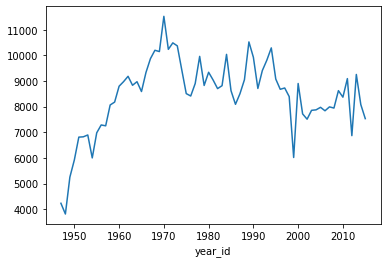

In [99]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

Text(0.5, 1.0, 'Perbandingan')

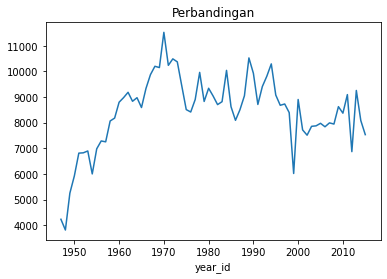

In [104]:
fig = nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()
fig.set_title('Perbandingan')

In [100]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum()

year_id
1947    4234
1948    3815
1949    5253
1950    5924
1951    6814
        ... 
2011    9097
2012    6872
2013    9259
2014    8084
2015    7535
Name: pts, Length: 69, dtype: int64

You can also create other types of plots, like a bar plot:

In [77]:
nba["fran_id"].value_counts().head(10)

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64

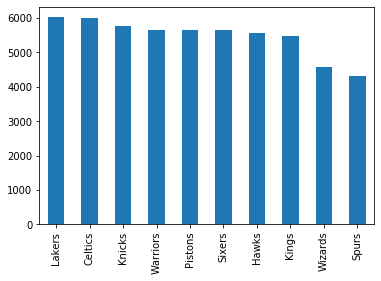

In [ ]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

In [ ]:
nba["fran_id"].value_counts().head(10)

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64